### Sprint Challenge: Natural Language Processing

In this Sprint Challenge, you will get an opportunity to work on additional exercises that will help further crystalize the concepts that you have been exposed to this week.






In [1]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.4.0)
Requirement not upgraded as not directly required: smart-open>=1.2.1 in /usr/local/lib/python3.6/dist-packages (from gensim) (1.5.7)
Requirement not upgraded as not directly required: scipy>=0.18.1 in /usr/local/lib/python3.6/dist-packages (from gensim) (0.19.1)
Requirement not upgraded as not directly required: six>=1.5.0 in /usr/local/lib/python3.6/dist-packages (from gensim) (1.11.0)
Requirement not upgraded as not directly required: numpy>=1.11.3 in /usr/local/lib/python3.6/dist-packages (from gensim) (1.14.3)
Requirement not upgraded as not directly required: boto3 in /usr/local/lib/python3.6/dist-packages (from smart-open>=1.2.1->gensim) (1.7.39)
Requirement not upgraded as not directly required: requests in /usr/local/lib/python3.6/dist-packages (from smart-open>=1.2.1->gensim) (2.18.4)
Requirement not upgraded as not directly required: bz2file in /usr/local/lib/python3.6/dist-packages (from

In [2]:
!pip install textblob

In [0]:
import pandas as pd
import numpy as np
import nltk
import gensim
import matplotlib.pyplot as plt
import itertools

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from textblob import TextBlob
from collections import Counter

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to /content/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

**Question 1**: Load the dataset  (only the first 1000 rows)related to restaurant reviews (Dataset: https://www.dropbox.com/s/i4zh5fb82x7i3sm/restaurant-test.csv?raw=1). 

This data set is a slight variation of the data set that you worked on in the project assignment.

Pre-process the dataset:

a) You will need to eliminate punctuations

b) You will have to deal with/remove stopwords

c) Tokenize the text

d) Stem or Lemmatize to determine the base form of the words

In [5]:
restaurant_reviews = pd.read_table('https://www.dropbox.com/s/i4zh5fb82x7i3sm/restaurant-test.csv?raw=1', 
                                   header=None, 
                                   nrows=1000)

print(restaurant_reviews.shape)
print(restaurant_reviews.isnull().any().any())

restaurant_reviews = restaurant_reviews.astype(str)
restaurant_reviews.head()

(1000, 1)
False


,0
0,My son just loves this place. Weird that he'd...
1,"We gave it a 9, so we will make that 5-, 4,5 s..."
2,After three lunch visits I've come to the conc...
3,What started out as a simple attempt to find a...
4,"If they had a Culver's on every street corner,..."


In [0]:
def process_text(sentence):
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # tokenize
    sentence = nltk.word_tokenize(sentence)
    
    # remove stop words and punctuation, lemmatize
    wnl = nltk.stem.WordNetLemmatizer()
    sentence = [wnl.lemmatize(w) for w in sentence 
                if w not in stop_words and w.isalpha()]
    
    return sentence

In [9]:
restaurant_tokens = restaurant_reviews[0].apply(process_text)
restaurant_tokens.head()

0    [My, son, love, place, Weird, ask, come, every...
1    [We, gave, make, star, To, start, beautiful, l...
2    [After, three, lunch, visit, I, come, conclusi...
3    [What, started, simple, attempt, find, perfect...
4    [If, Culver, every, street, corner, cardiologi...
Name: 0, dtype: object

**Question 2**: **Perform Vectorization** - you will apply 3 different vectorization techniques. Each technique will generate similar document term matrices where the rows of the matrix will represent the respective text messages and the columns will represent each word or a combination of words. Note that the biggest difference between the techniques is the value depicted in the actual cells of the matrix.

1) Create a document term matrix based on the count of the words in the document. You may want to restrict the # of features/columns based on the top most features ordered by term frequency across the document

2) Create a bigram vector using a combination of adjacent words. In this case, n=2

3) Create a TF-IDF vector wherein the cells of the matrix contain values (i.e. weights) to depict how important a word is to an individual review

In [10]:
restaurant_corpus = list(map(lambda x: ' '.join(x), restaurant_tokens))
restaurant_corpus[:10]

['My son love place Weird ask come everytime go grocery shopping bribe even care go Toys R Us Not complaining I little knick knack quite selection little travel toy educational material kid holiday stuff I bought couple red bow brass jingle wreath put porch light Why cheap end spending',
 'We gave make star To start beautiful lucked outside heater next roaring fireplace The service could better thanks YELPing friend hardly needed menu The Portugese clam soup though salty side The pork belly steak taco top We gave dish Margaritas awesome Smokehouse Pomogranite short glass It long time since solid Thanks guy Oh table guac must PS get bread pudding get sauce side It top sweet My pancreas running lap right',
 'After three lunch visit I come conclusion restaurant fare ok book I probably back ca guarantee many place walking quickly politey greeted taken table You notice decor nice somewhat cluttered I fan thing put right place Maybe price lunch come quickly expected I hoping little love put 

In [0]:
def sparse_to_dataframe(vectorizer, matrix):
    vocab = vectorizer.vocabulary_
    columns = [' ' for _ in range(len(vocab))]
    for word, number in vocab.items():
        columns[number] = word

    df = pd.DataFrame(matrix.todense(), columns=columns)
    return df

### Document Term Matrix

In [0]:
max_features = 1000

In [0]:
vectorizer = CountVectorizer(max_features=max_features)
document_term_matrix = vectorizer.fit_transform(restaurant_corpus)

In [14]:
sparse_to_dataframe(vectorizer, document_term_matrix).head()

,able,absolutely,across,actual,actually,add,added,addition,after,afternoon,...,year,yelp,yes,yesterday,yet,yogurt,you,young,yum,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Bigram Matrix

In [0]:
bigram_vectorizer = CountVectorizer(max_features=max_features, 
                                    ngram_range=(2,2))

bigram_matrix = bigram_vectorizer.fit_transform(restaurant_corpus)

In [16]:
sparse_to_dataframe(bigram_vectorizer, bigram_matrix).head()

,able find,absolutely love,across street,advance health,almost every,also get,also give,also good,also great,also ordered,...,would say,would take,write review,year ago,year old,yelp review,you ca,you could,you get,you know
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Matrix

In [0]:
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
tfidf_matrix = tfidf_vectorizer.fit_transform(restaurant_corpus)

In [18]:
sparse_to_dataframe(tfidf_vectorizer, tfidf_matrix).head()

,able,absolutely,across,actual,actually,add,added,addition,after,afternoon,...,year,yelp,yes,yesterday,yet,yogurt,you,young,yum,yummy
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.143395,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.110147,0.0,0.0,0.0
3,0.0,0.056788,0.0,0.0,0.0,0.0,0.0,0.0,0.054264,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.041682,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


**Question 3: ** 

**a)** Train the Word2vec model with tokenized content; size of the word vectors is 5; the word should show-up at least once in the raw content

**b)** List the number of words in the model's vocabulary

**c)**Examine word similarity to the word "awesome" and "loves"

**d)**Consider each review to be a document on its own. Examine document similarity with Doc2vec to any body of text of your choice

### Word2vec

In [0]:
word2vec_model = gensim.models.Word2Vec(restaurant_tokens, size=5, min_count=1)

In [20]:
print('Number of words:', len(word2vec_model.wv.vocab))

Number of words: 12051


In [21]:
print('Similar to "awesome"')
word2vec_model.wv.most_similar(positive=['awesome'])

Similar to "awesome"


[('live', 0.9999657869338989),
 ('Well', 0.9999562501907349),
 ('feel', 0.9999301433563232),
 ('looking', 0.9999288320541382),
 ('asked', 0.9999165534973145),
 ('slice', 0.9999029636383057),
 ('dog', 0.9998955726623535),
 ('find', 0.9998890161514282),
 ('enough', 0.9998877048492432),
 ('space', 0.9998694658279419)]

"loves" is not in the vocabulary of the model, so I will examine words similar to "love".

In [22]:
print('Similar to "love"')
word2vec_model.wv.most_similar(positive=['love'])

Similar to "love"


[('Square', 0.9999426007270813),
 ('highly', 0.9999388456344604),
 ('went', 0.9998972415924072),
 ('pizza', 0.999876856803894),
 ('grab', 0.9998564124107361),
 ('chain', 0.9998213052749634),
 ('surprised', 0.9998061060905457),
 ('issue', 0.9997873902320862),
 ('Im', 0.9997825622558594),
 ('immediately', 0.9997657537460327)]

### Doc2vec

In [23]:
!wget https://raw.githubusercontent.com/PedramNavid/trump_speeches/master/data/speech_70.txt

--2018-06-15 16:44:53--  https://raw.githubusercontent.com/PedramNavid/trump_speeches/master/data/speech_70.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21652 (21K) [text/plain]
Saving to: ‘speech_70.txt.1’

speech_70.txt.1     100%[===================>]  21.14K  --.-KB/s    in 0.01s   

2018-06-15 16:44:53 (1.61 MB/s) - ‘speech_70.txt.1’ saved [21652/21652]



In [0]:
def cleaned_text(text):
    punctuation = ['!', ',', '.', ':', ';', '?']
    lowercase = 'abcdefghijklmnopqrstuvwxyz'
    
    for char in set(text):
        if char not in punctuation and char not in lowercase:
            text = text.replace(char, ' ')

    return text

In [25]:
query_doc = open('speech_70.txt').read().lower()
query_doc = cleaned_text(query_doc)

print(query_doc[:100])

remarks at the central florida fairgrounds in orlando, florida thank you, everybody, thank you. wow.


In [26]:
doc_corpus = [gensim.models.doc2vec.TaggedDocument(doc, [i])
              for i, doc in enumerate(restaurant_tokens)]

doc_corpus[:5]

[TaggedDocument(words=['My', 'son', 'love', 'place', 'Weird', 'ask', 'come', 'everytime', 'go', 'grocery', 'shopping', 'bribe', 'even', 'care', 'go', 'Toys', 'R', 'Us', 'Not', 'complaining', 'I', 'little', 'knick', 'knack', 'quite', 'selection', 'little', 'travel', 'toy', 'educational', 'material', 'kid', 'holiday', 'stuff', 'I', 'bought', 'couple', 'red', 'bow', 'brass', 'jingle', 'wreath', 'put', 'porch', 'light', 'Why', 'cheap', 'end', 'spending'], tags=[0]),
 TaggedDocument(words=['We', 'gave', 'make', 'star', 'To', 'start', 'beautiful', 'lucked', 'outside', 'heater', 'next', 'roaring', 'fireplace', 'The', 'service', 'could', 'better', 'thanks', 'YELPing', 'friend', 'hardly', 'needed', 'menu', 'The', 'Portugese', 'clam', 'soup', 'though', 'salty', 'side', 'The', 'pork', 'belly', 'steak', 'taco', 'top', 'We', 'gave', 'dish', 'Margaritas', 'awesome', 'Smokehouse', 'Pomogranite', 'short', 'glass', 'It', 'long', 'time', 'since', 'solid', 'Thanks', 'guy', 'Oh', 'table', 'guac', 'must', 

In [0]:
doc2vec_model = gensim.models.Doc2Vec(doc_corpus, 
                                      vector_size=200, 
                                      min_count=5,
                                      seed=42)

In [30]:
vocab = list(doc2vec_model.wv.vocab)
query_doc = [w for w in query_doc if w in vocab]
query_doc = doc2vec_model.infer_vector(query_doc)

similar_docs = doc2vec_model.docvecs.most_similar([query_doc])
similar_docs[0]

(523, 0.0909188836812973)

In [31]:
doc_corpus[523]

TaggedDocument(words=['Friendly', 'service', 'I', 'enjoyed', 'food', 'I', 'like', 'go', 'back', 'try', 'item', 'right', 'I', 'kinda', 'perturbed', 'This', 'dumb', 'could', 'ever', 'think', 'putting', 'door', 'bathroo'], tags=[523])

In [32]:
restaurant_reviews.iloc[523][0]

"---Good--- Friendly service and I enjoyed the food.  I'd like to go back and try a few other items, but right now I'm kinda perturbed about this place.\\n\\n---Bad---  1) This is just dumb, how could you ever think of putting push/push doors on your bathroo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"

**Question 4: **Iterate over the reviews and output the polarity and subjectivity of the respective reviews. What is the underlying trend with respect to polarity (i.e. positive or negative)?

In [33]:
restaurant_textblobs = list(map(TextBlob, restaurant_corpus))
restaurant_textblobs[:5]

[TextBlob("My son love place Weird ask come everytime go grocery shopping bribe even care go Toys R Us Not complaining I little knick knack quite selection little travel toy educational material kid holiday stuff I bought couple red bow brass jingle wreath put porch light Why cheap end spending"),
 TextBlob("We gave make star To start beautiful lucked outside heater next roaring fireplace The service could better thanks YELPing friend hardly needed menu The Portugese clam soup though salty side The pork belly steak taco top We gave dish Margaritas awesome Smokehouse Pomogranite short glass It long time since solid Thanks guy Oh table guac must PS get bread pudding get sauce side It top sweet My pancreas running lap right"),
 TextBlob("After three lunch visit I come conclusion restaurant fare ok book I probably back ca guarantee many place walking quickly politey greeted taken table You notice decor nice somewhat cluttered I fan thing put right place Maybe price lunch come quickly expec

In [0]:
polarity = [text.sentiment.polarity for text in restaurant_textblobs]
subjectivity = [text.sentiment.subjectivity for text in restaurant_textblobs]

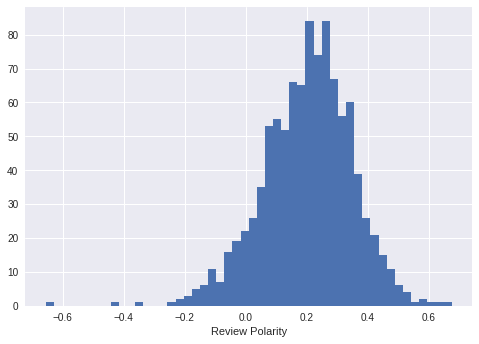

In [35]:
plt.hist(polarity, bins=50), plt.xlabel('Review Polarity');

The reviews appear to contain mostly sentiment that is slightly positive.

**Question 5:** Train a Naive Bayes classifier on a subset of the movie_reviews data set which is part of the NLTK corpus. Once the classifier has been trained, evaluate it's accuracy by testing it against a subset of data from the movie_reviews data set. 

**Step 1**: Import the data set from the nltk corpus

**Step 2**: Examine the categories within the movie_reviews data set

**Step 3**: Examine the files that constitute the movie_reviews data set

**Step 4**: Store a list of words for each file ID, followed by the positive or negative label in one big list.
*Note *that each review has its own ID

**Step 5**:  Randomize the items of a list in place. This is required since there is a high likelihood that we would train on all of the negatives, some positives, and then test only against positives

**Step 6**: Find the most-used words in the text and count how often they are used

**Step 7**: Select the top 5,000 most common words

**Step 8**: Iterate  over the top 5,000  words and build a **feature set **that contains words from across the reviews including whether the word is among the top 5000 words and the corresponding category 

**Step 9**: First split the feature set list in a training and testing subsets


**Step 10**: Train the Naive Bayes Classifier model with the training data set

**Step 11**: Evaluate the accuracy of the model against the testing subset

**Step 12**: Output the most informative features - (for example: which features appear more often in a postive review as compared to a negative review or vice versa).



In [0]:
# Step 1
from nltk.corpus import movie_reviews

In [37]:
# Steps 2 and 3
print('Categories:', movie_reviews.categories())
print('Files', movie_reviews.fileids()[:10])

Categories: ['neg', 'pos']
Files ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


In [0]:
# Step 4 (removing stopwords as well)
stop = nltk.corpus.stopwords.words('english')

documents = [([w for w in movie_reviews.words(i) if w.lower() not in stop 
               and w.isalpha()], i.split('/')[0]) 
               for i in movie_reviews.fileids()]

In [39]:
print(documents[0][0])
print(documents[0][1])

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scenes', 'tons', 'weird', '

In [40]:
# Step 5
np.random.shuffle(documents)
print(documents[0][0])
print(documents[0][1])

['naturally', 'core', 'leon', 'gast', 'kings', 'fight', 'fight', 'thanks', 'business', 'savvy', 'king', 'ageing', 'muhammad', 'ali', 'pitted', 'formidable', 'hulk', 'heavyweight', 'champion', 'george', 'foreman', 'fans', 'treated', 'round', 'battle', 'endurance', 'strategy', 'much', 'brute', 'strength', 'immediately', 'entered', 'boxing', 'lore', 'benefit', 'first', 'hand', 'recollections', 'old', 'ex', 'pug', 'norman', 'mailer', 'classic', 'conflict', 'brought', 'back', 'life', 'kings', 'tackles', 'issues', 'harder', 'pin', 'simple', 'facts', 'boxing', 'match', 'questions', 'political', 'power', 'social', 'justice', 'appear', 'throughout', 'documentary', 'gast', 'could', 'hardly', 'choose', 'otherwise', 'considering', 'vocal', 'uncompromising', 'politics', 'muhammad', 'ali', 'member', 'controversial', 'black', 'separatist', 'movement', 'nation', 'islam', 'ali', 'opens', 'gast', 'film', 'forceful', 'swipe', 'united', 'states', 'ali', 'hollers', 'damn', 'america', 'audience', 'knows', '

In [41]:
# Step 6
reviews = map(lambda x: x[0], documents)
words = list(itertools.chain(*reviews))
word_counts = Counter(words)

print('Most Frequent Words:\n', word_counts.most_common(10))

Most Frequent Words:
 [('film', 9517), ('one', 5852), ('movie', 5771), ('like', 3690), ('even', 2565), ('time', 2411), ('good', 2411), ('story', 2169), ('would', 2109), ('much', 2049)]


In [0]:
reviews = list(map(lambda x: ' '.join(x[0]), documents))
categories = list(map(lambda x: x[1], documents))

# Steps 7 and 8
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(reviews)

In [0]:
# Step 9
X_train, X_test, y_train, y_test = train_test_split(X, categories, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [58]:
# Step 10
clf = GaussianNB()
clf.fit(X_train.toarray(), y_train)

GaussianNB(priors=None)

In [59]:
# Step 11
print('Test Accuracy: {}%'.format(clf.score(X_test.toarray(), y_test)*100))

Test Accuracy: 70.5%


There are exactly 1000 'pos' reviews and 1000 'neg' reviews, so this is better than random or informed guessing.

In [60]:
# Step 12

# I will select informative features on the criterion that their means for
# each category are far apart

n_features = 20
mean_differences = np.absolute(clf.theta_[1] - clf.theta_[0])
top_features = mean_differences.argsort()[-1:-n_features:-1]

sparse_to_dataframe(vectorizer, X).columns[top_features]

Index(['bad', 'movie', 'plot', 'life', 'truman', 'worst', 'boring', 'great',
       'stupid', 'even', 'also', 'supposed', 'war', 'nothing', 'reason',
       'world', 'family', 'jackie', 'godzilla'],
      dtype='object')

**Question 6: ** Write a blog post on how you could apply one or more of the techniques that you have learned this week. The recommended approach would be explore a data set (Netflix reviews or Yelp reviews) and utilize text processing that we have covered to derive insights from the body of text.
